In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.svm               
import sklearn.metrics           
import sklearn.model_selection   
import scipy
import scipy.stats               
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)     

In [37]:
plot_limits = (-3,4,-3,4)

def plot_decision_function(model):
    """
    Plots the decision function of a model as a red-blue heatmap.
    The region evaluated, along with x and y axis limits, are determined by 'extent'.
    """
    x1min, x1max ,x2min, x2max = plot_limits
    x1, x2 = np.meshgrid(np.linspace(x1min, x1max, 200), np.linspace(x2min, x2max, 200))
    X = np.column_stack([x1.ravel(), x2.ravel()])
    y = model.decision_function(X).reshape(x1.shape)
    plt.imshow(-y, extent=plot_limits, origin='lower', vmin=-1, vmax=1, cmap='bwr', alpha=0.5)
    if y.min() < 0 and y.max() > 0:
        plt.contour(x1, x2, y, levels=[0], colors=['k']) 
    plt.xlim([x1min, x1max])
    plt.ylim([x2min, x2max])
    
def plot_data(X, y):
    """Plots the data from Exercise 1"""
    plt.scatter(*X[y==0].T, marker="x", c="r")
    plt.scatter(*X[y==1].T, marker="x", c="b")
    plt.xlim(plot_limits[:2])
    plt.ylim(plot_limits[2:])
    plt.gca().set_aspect('equal')    

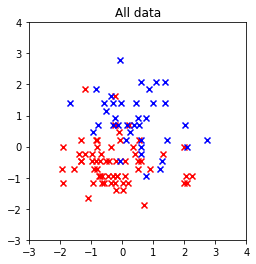

In [38]:
data = np.loadtxt("sample_data.csv", delimiter=",", skiprows=1)
X, y = data[:,:2], data[:, -1]
scaler = sklearn.preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
plot_data(X,y)
plt.title('All data');

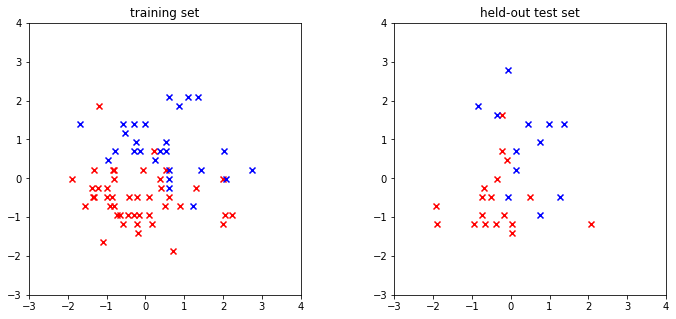

In [39]:
# Your code here. Aim for 6-10 lines.
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y,
                                                                            test_size=0.3,
                                                                            random_state=0)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("training set")
plot_data(X_train, y_train)

plt.subplot(1,2,2)
plt.title("held-out test set")
plot_data(X_test, y_test)

In [33]:
C_grid = np.logspace(0, 3, 4)
gamma_grid = np.logspace(-2, 1, 4)

print(C_grid)
print(gamma_grid)

[   1.   10.  100. 1000.]
[ 0.01  0.1   1.   10.  ]


In [45]:
for i in range(4):
    for j in range(4):
        C = C_grid[i]
        gamma = gamma_grid[j]
        svm = sklearn.svm.SVC(C=C, gamma=gamma, kernel='rbf')
        svm.fit(X_train, y_train)
        accuracy = svm.score(X_train, y_train)
        print("%.1f%% training accuracy for C=%.1f gamma=%.2f" % (accuracy*100, C, gamma))
        
        
for i in range(4):
    for j in range(4):
        C = C_grid[i]
        gamma = gamma_grid[j]
        svm = sklearn.svm.SVC(C=C, gamma=gamma, kernel='rbf')
        svm.fit(X_test, y_test)
        accuracy = svm.score(X_test, y_test)
        print("%.1f%% testing accuracy for C=%.1f gamma=%.2f" % (accuracy*100, C, gamma))
        
    

72.9% training accuracy for C=1.0 gamma=0.01
88.6% training accuracy for C=1.0 gamma=0.10
90.0% training accuracy for C=1.0 gamma=1.00
94.3% training accuracy for C=1.0 gamma=10.00
88.6% training accuracy for C=10.0 gamma=0.01
88.6% training accuracy for C=10.0 gamma=0.10
92.9% training accuracy for C=10.0 gamma=1.00
98.6% training accuracy for C=10.0 gamma=10.00
87.1% training accuracy for C=100.0 gamma=0.01
90.0% training accuracy for C=100.0 gamma=0.10
92.9% training accuracy for C=100.0 gamma=1.00
100.0% training accuracy for C=100.0 gamma=10.00
87.1% training accuracy for C=1000.0 gamma=0.01
90.0% training accuracy for C=1000.0 gamma=0.10
97.1% training accuracy for C=1000.0 gamma=1.00
100.0% training accuracy for C=1000.0 gamma=10.00
63.3% testing accuracy for C=1.0 gamma=0.01
80.0% testing accuracy for C=1.0 gamma=0.10
86.7% testing accuracy for C=1.0 gamma=1.00
100.0% testing accuracy for C=1.0 gamma=10.00
76.7% testing accuracy for C=10.0 gamma=0.01
80.0% testing accuracy for 

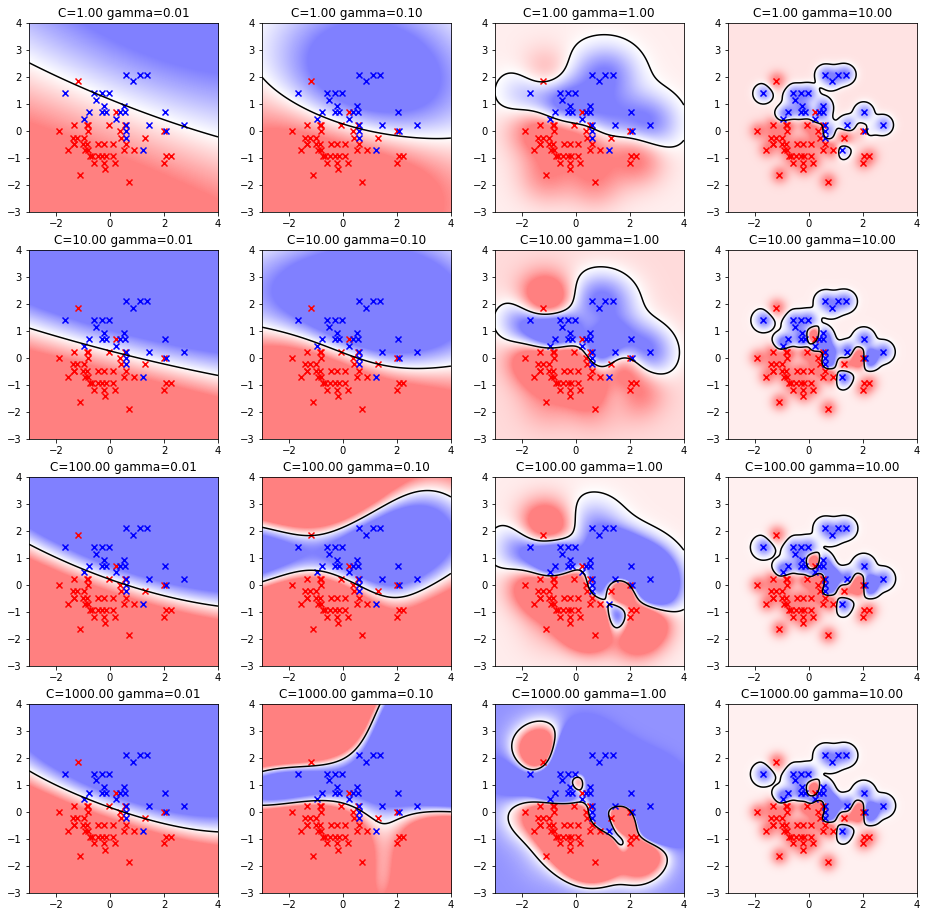

In [41]:
num_C = len(C_grid)
num_gamma = len(gamma_grid)

plt.figure(figsize=(16, 16))
for i in range(4):
    for j in range(4):
        C = C_grid[i]
        gamma = gamma_grid[j]
        
        svm = sklearn.svm.SVC(C=C, gamma=gamma, kernel='rbf')
        svm.fit(X_train, y_train)

        plt.subplot(num_C, num_gamma, i*num_C + j+1)
        plot_decision_function(svm)
        plot_data(X_train, y_train)
        plt.title('C=%.2f gamma=%.2f' % (C, gamma))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
best parameters: {'C': 10.0, 'gamma': 0.01}
87.1% accuracy on validation sets (average)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:    0.1s finished


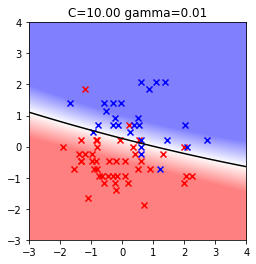

In [46]:
svm = sklearn.svm.SVC(kernel='rbf')
param_grid = { 'C' : C_grid, 'gamma' : gamma_grid}
gridcv = sklearn.model_selection.GridSearchCV(svm, param_grid, verbose=1, cv=3)
gridcv.fit(X_train, y_train)

plot_decision_function(gridcv.best_estimator_)
plot_data(X_train, y_train)
plt.title('C=%.2f gamma=%.2f' % (gridcv.best_params_['C'], gridcv.best_params_['gamma']));

print("best parameters:", gridcv.best_params_)
print("%.1f%% accuracy on validation sets (average)" % (gridcv.best_score_*100))

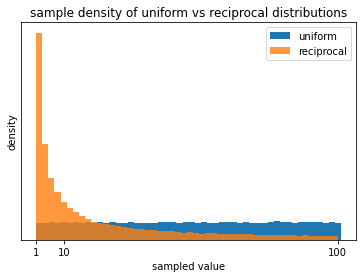

In [47]:
# Create two objects, each representing a different random distribution
reciprocal_distribution = scipy.stats.reciprocal(1, 100)  # Reciprocal distribution in range [0,100]
uniform_distribution = scipy.stats.uniform(1, 100)        # Uniform distribution in range [0,100]

# Draw 100,000 samples from each of the distributions
np.random.seed(0)
reciprocal_samples = reciprocal_distribution.rvs(100000);
uniform_samples = uniform_distribution.rvs(100000);

# Plot the density of samples from each distribution.
plt.hist(uniform_samples, bins=50, label='uniform')
plt.hist(reciprocal_samples, bins=50, label='reciprocal', alpha=0.8);
plt.xticks([1, 10, 100])
plt.yticks([])
plt.xlabel('sampled value')
plt.ylabel('density')
plt.title("sample density of uniform vs reciprocal distributions")
plt.legend();

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.4s finished


best parameters: {'C': 4.27708304996207, 'gamma': 0.024365700014641993}
88.6% accuracy on validation sets (average)


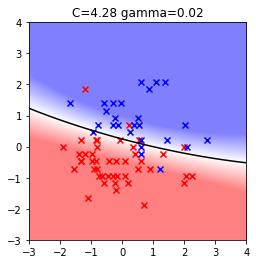

In [48]:
# Your code here. Aim for 8-10 lines.
param_distributions = {
    'C'     : scipy.stats.reciprocal(1.0, 1000.),
    'gamma' : scipy.stats.reciprocal(0.01, 10.),
}
randcv = sklearn.model_selection.RandomizedSearchCV(svm, param_distributions, n_iter=50,
                                                    verbose=1, random_state=0)
randcv.fit(X_train, y_train)

plot_decision_function(randcv.best_estimator_)
plot_data(X_train, y_train)
plt.title('C=%.2f gamma=%.2f' % (randcv.best_params_['C'], randcv.best_params_['gamma']));

print("best parameters:", randcv.best_params_)
print("%.1f%% accuracy on validation sets (average)" % (randcv.best_score_*100))

In [49]:
# Your code here. Aim for 8-10 lines.
grid_accuracy_train = sklearn.metrics.accuracy_score(y_train, gridcv.best_estimator_.predict(X_train))
grid_accuracy_test  = sklearn.metrics.accuracy_score(y_test,  gridcv.best_estimator_.predict(X_test))
print("grid search:")
print("  %.1f%% train accuracy" % (grid_accuracy_train*100))
print("  %.1f%% test accuracy"  % (grid_accuracy_test*100))

rand_accuracy_train = sklearn.metrics.accuracy_score(y_train, randcv.best_estimator_.predict(X_train))
rand_accuracy_test  = sklearn.metrics.accuracy_score(y_test,  randcv.best_estimator_.predict(X_test))
print("random search:")
print("  %.1f%% train accuracy" % (rand_accuracy_train*100))
print("  %.1f%% test accuracy"  % (rand_accuracy_test*100))

grid search:
  88.6% train accuracy
  76.7% test accuracy
random search:
  88.6% train accuracy
  80.0% test accuracy
